Processed 34 valid data points out of 34 files.
z = 1.0 mm, Width_x = 3.426 mm, Width_y = 3.484 mm
z = 1.5 mm, Width_x = 3.186 mm, Width_y = 3.344 mm
z = 2.0 mm, Width_x = 2.964 mm, Width_y = 3.183 mm
z = 2.5 mm, Width_x = 2.783 mm, Width_y = 3.020 mm
z = 3.0 mm, Width_x = 2.669 mm, Width_y = 2.844 mm
z = 3.5 mm, Width_x = 2.568 mm, Width_y = 2.683 mm
z = 4.0 mm, Width_x = 2.471 mm, Width_y = 2.510 mm
z = 4.5 mm, Width_x = 2.358 mm, Width_y = 2.338 mm
z = 5.0 mm, Width_x = 2.212 mm, Width_y = 2.164 mm
z = 5.5 mm, Width_x = 2.030 mm, Width_y = 1.976 mm
z = 6.0 mm, Width_x = 1.848 mm, Width_y = 1.799 mm
z = 6.5 mm, Width_x = 1.627 mm, Width_y = 1.610 mm
z = 7.0 mm, Width_x = 1.383 mm, Width_y = 1.411 mm
z = 7.5 mm, Width_x = 1.147 mm, Width_y = 1.210 mm
z = 8.0 mm, Width_x = 0.908 mm, Width_y = 0.963 mm
z = 8.5 mm, Width_x = 0.675 mm, Width_y = 0.691 mm
z = 9.0 mm, Width_x = 0.445 mm, Width_y = 0.433 mm
z = 9.5 mm, Width_x = 0.210 mm, Width_y = 0.185 mm
z = 9.6 mm, Width_x = 0.164 mm, Wi

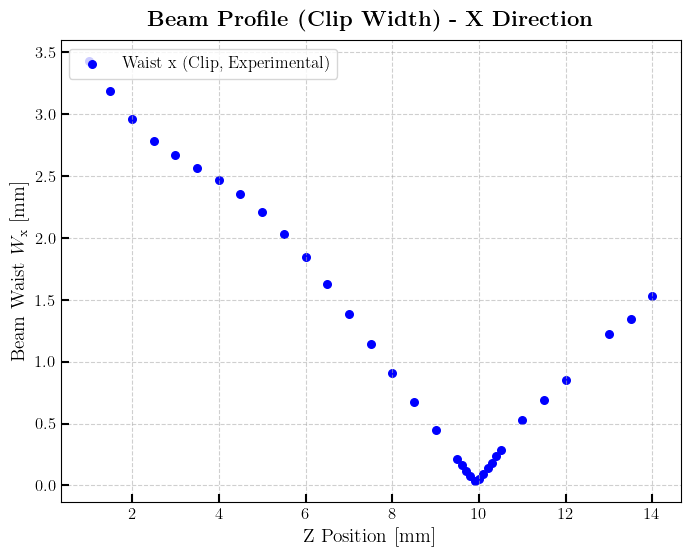

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping/fig/beam_profile_clip_y.png


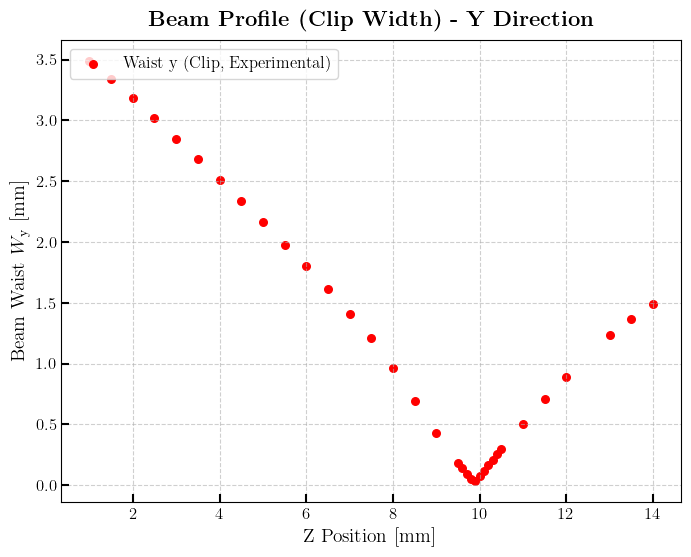

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower()],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                # Check for "--" or invalid values before conversion
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    # Only append if valid data found
    if clip_width_x is not None and clip_width_y is not None:
        width_x.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values.append(z)  # Only append z if valid widths found
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width) - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_clip_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width) - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_clip_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Processed 34 valid data points out of 34 files.
z = 1.0 mm, Width_x = 3.305 mm, Width_y = 3.402 mm
z = 1.5 mm, Width_x = 3.136 mm, Width_y = 3.253 mm
z = 2.0 mm, Width_x = 2.962 mm, Width_y = 3.100 mm
z = 2.5 mm, Width_x = 2.804 mm, Width_y = 2.943 mm
z = 3.0 mm, Width_x = 2.675 mm, Width_y = 2.775 mm
z = 3.5 mm, Width_x = 2.554 mm, Width_y = 2.625 mm
z = 4.0 mm, Width_x = 2.433 mm, Width_y = 2.457 mm
z = 4.5 mm, Width_x = 2.298 mm, Width_y = 2.297 mm
z = 5.0 mm, Width_x = 2.144 mm, Width_y = 2.128 mm
z = 5.5 mm, Width_x = 1.965 mm, Width_y = 1.948 mm
z = 6.0 mm, Width_x = 1.777 mm, Width_y = 1.775 mm
z = 6.5 mm, Width_x = 1.583 mm, Width_y = 1.588 mm
z = 7.0 mm, Width_x = 1.370 mm, Width_y = 1.397 mm
z = 7.5 mm, Width_x = 1.144 mm, Width_y = 1.190 mm
z = 8.0 mm, Width_x = 0.915 mm, Width_y = 0.942 mm
z = 8.5 mm, Width_x = 0.704 mm, Width_y = 0.677 mm
z = 9.0 mm, Width_x = 0.503 mm, Width_y = 0.426 mm
z = 9.5 mm, Width_x = 0.292 mm, Width_y = 0.182 mm
z = 9.6 mm, Width_x = 0.251 mm, Wi

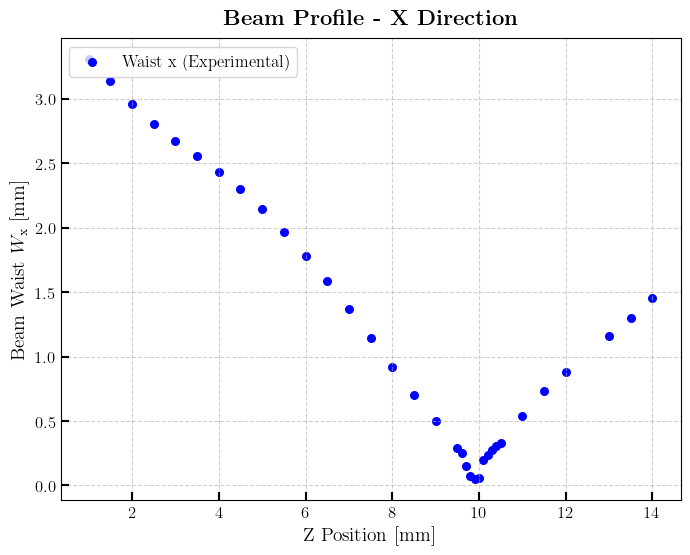

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping/fig/beam_profile_y.png


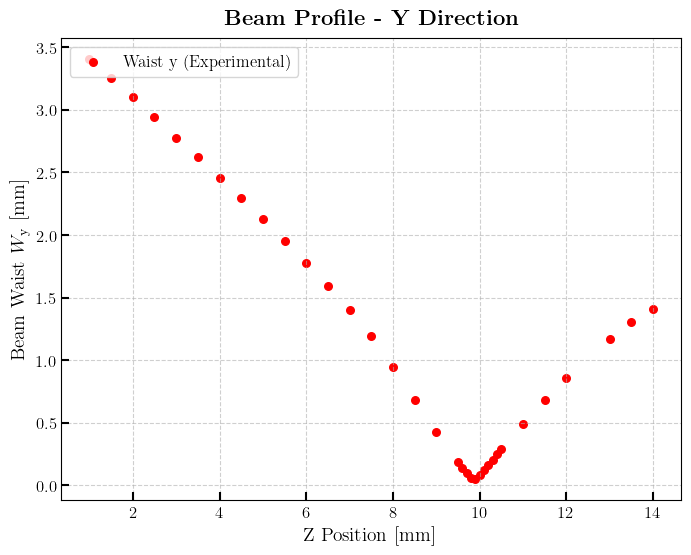

In [5]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower() and 
                    float(os.path.basename(f).split('mm')[0].strip()) <= 14],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    z_values.append(z)
    width_x.append(gaussian_dia_x / 2 / 1000)  # Convert µm to mm, diameter to radius
    width_y.append(gaussian_dia_y / 2 / 1000)  # Convert µm to mm, diameter to radius

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Missing data ('--') in /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/14.5mm_#001.txt for Beam Width Clip values.
Skipping /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/14.5mm_#001.txt due to missing or invalid Beam Width Clip data.
Missing data ('--') in /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/15mm_#001.txt for Beam Width Clip values.
Skipping /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/15mm_#001.txt due to missing or invalid Beam Width Clip data.
Processed 33 valid data points out of 35 files.
z = 2.0 mm, Width_x = 2.595 mm, Width_y = 2.759 mm
z = 2.5 mm, Width_x = 2.478 mm, Width_y = 2.650 mm
z = 3.0 mm, Width_x = 2.343 mm, Width_y = 2.439 mm
z = 3.5 mm, Width_x = 2.167 mm, Width_y = 2.263 mm
z = 4.0 mm, Width_x = 1.999 mm, Width_y = 2.053 mm
z = 4.5 mm, Width_x = 1.824 mm, Width_y = 1.8

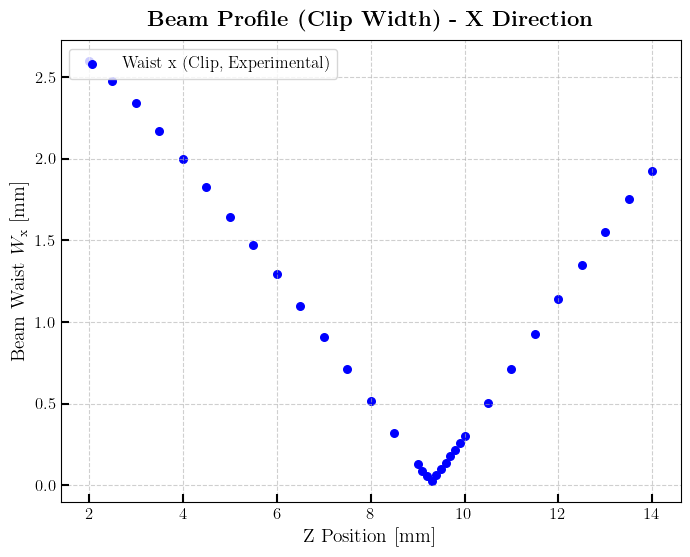

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/fig/beam_profile_clip_y.png


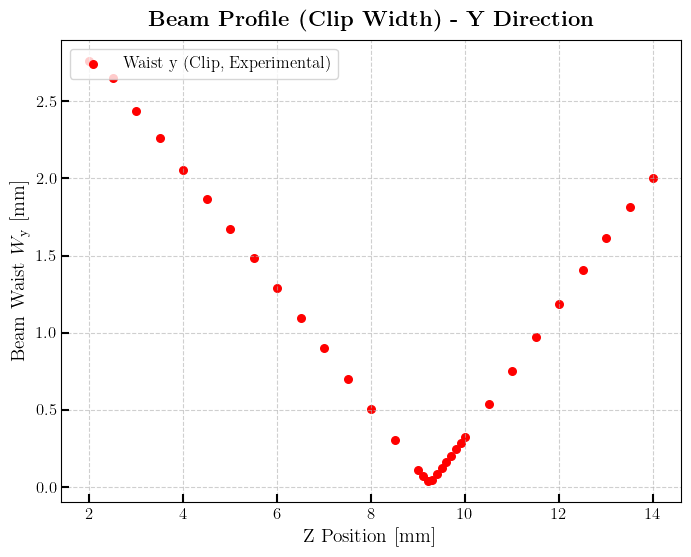

In [4]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
#data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_collimated/FINAL FINAL"
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower()],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                # Check for "--" or invalid values before conversion
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    # Only append if valid data found
    if clip_width_x is not None and clip_width_y is not None:
        width_x.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values.append(z)  # Only append z if valid widths found
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width) - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_clip_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width) - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_clip_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Processed 2mm_#001.txt: wx = 5263.04, wy = 5565.33
Processed 2.5mm_#001.txt: wx = 4985.36, wy = 5266.82
Processed 3mm_#001.txt: wx = 4680.24, wy = 4943.51
Processed 3.5mm_#001.txt: wx = 4363.06, wy = 4599.54
Processed 4mm_#001.txt: wx = 4037.98, wy = 4238.15
Processed 4.5mm_#001.txt: wx = 3693.7, wy = 3867.21
Processed 5mm_#001.txt: wx = 3326.32, wy = 3468.12
Processed 5.5mm_#001.txt: wx = 2956.37, wy = 3069.04
Processed 6mm_#001.txt: wx = 2584.62, wy = 2660.59
Processed 6.5mm_#001.txt: wx = 2207.24, wy = 2258.0
Processed 7mm_#001.txt: wx = 1818.93, wy = 1856.61
Processed 7.5mm_#001.txt: wx = 1425.47, wy = 1441.84
Processed 8mm_#001.txt: wx = 1030.07, wy = 1033.52
Processed 8.5mm_#001.txt: wx = 636.89, wy = 621.08
Processed 9mm_#001.txt: wx = 254.76, wy = 219.23
Processed 9.1mm_#001.txt: wx = 182.44, wy = 148.46
Processed 9.2mm_#001.txt: wx = 120.66, wy = 94.22
Processed 9.3mm_#001.txt: wx = 82.79, wy = 112.13
Processed 9.4mm_#001.txt: wx = 134.62, wy = 170.94
Processed 9.5mm_#001.txt:

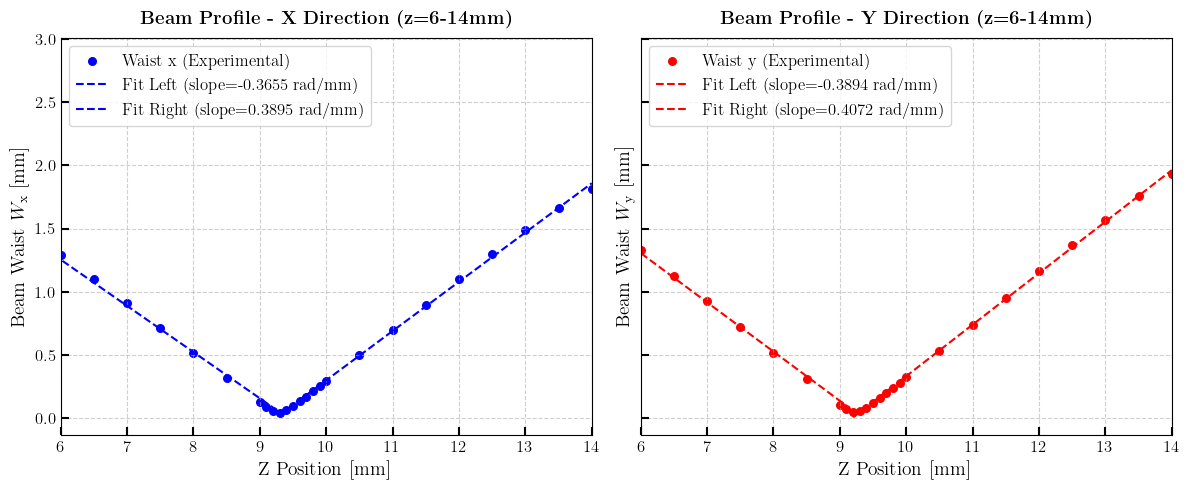

In [5]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015"
# Match both *mm_#001.txt and *m_#001.txt
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower() and
     float(os.path.basename(f).split('m')[0].strip()) <= 16],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    # Split on 'm' to handle both 'mm' and 'm'
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort data by z
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Filter data for z between 6 and 14 mm
mask = (z_values >= 1) & (z_values <= 14)
z_values_filtered = z_values[mask]
width_x_filtered = width_x[mask]
width_y_filtered = width_y[mask]

print(f"Processed {len(z_values_filtered)} valid data points in range 6-14 mm out of {len(z_values)} total files.")

# Print filtered data
for z, wx, wy in zip(z_values_filtered, width_x_filtered, width_y_filtered):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Linear fits for X direction (filtered range)
min_idx_x = np.argmin(width_x_filtered)
z_left_x = z_values_filtered[:min_idx_x]
width_x_left = width_x_filtered[:min_idx_x]
z_right_x = z_values_filtered[min_idx_x:]
width_x_right = width_x_filtered[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction (filtered range)
min_idx_y = np.argmin(width_y_filtered)
z_left_y = z_values_filtered[:min_idx_y]
width_y_left = width_y_filtered[:min_idx_y]
z_right_y = z_values_filtered[min_idx_y:]
width_y_right = width_y_filtered[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Create comparison plots in a single canvas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_filtered, width_x_filtered, color='b', label='Waist x (Experimental)', marker='o', s=30)
ax1.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
ax1.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile - X Direction (z=6-14mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xlim(6, 14)

# Plot Width y comparison
ax2.scatter(z_values_filtered, width_y_filtered, color='r', label='Waist y (Experimental)', marker='o', s=30)
ax2.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
ax2.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile - Y Direction (z=6-14mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_xlim(6, 14)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_6-14mm.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

Processed 2mm_#001.txt: wx = 5263.04, wy = 5565.33
Processed 2.5mm_#001.txt: wx = 4985.36, wy = 5266.82
Processed 3mm_#001.txt: wx = 4680.24, wy = 4943.51
Processed 3.5mm_#001.txt: wx = 4363.06, wy = 4599.54
Processed 4mm_#001.txt: wx = 4037.98, wy = 4238.15
Processed 4.5mm_#001.txt: wx = 3693.7, wy = 3867.21
Processed 5mm_#001.txt: wx = 3326.32, wy = 3468.12
Processed 5.5mm_#001.txt: wx = 2956.37, wy = 3069.04
Processed 6mm_#001.txt: wx = 2584.62, wy = 2660.59
Processed 6.5mm_#001.txt: wx = 2207.24, wy = 2258.0
Processed 7mm_#001.txt: wx = 1818.93, wy = 1856.61
Processed 7.5mm_#001.txt: wx = 1425.47, wy = 1441.84
Processed 8mm_#001.txt: wx = 1030.07, wy = 1033.52
Processed 8.5mm_#001.txt: wx = 636.89, wy = 621.08
Processed 9mm_#001.txt: wx = 254.76, wy = 219.23
Processed 9.1mm_#001.txt: wx = 182.44, wy = 148.46
Processed 9.2mm_#001.txt: wx = 120.66, wy = 94.22
Processed 9.3mm_#001.txt: wx = 82.79, wy = 112.13
Processed 9.4mm_#001.txt: wx = 134.62, wy = 170.94
Processed 9.5mm_#001.txt:

/Users/asca/miniconda/envs/ascanio_root/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/z2/x35ff22s25jgptbssk4ctryc0000gn/T/ipykernel_83535/15987697.py:128: RuntimeWarning: divide by zero encountered in scalar divide
  w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))


Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/fig/beam_profile_x.png


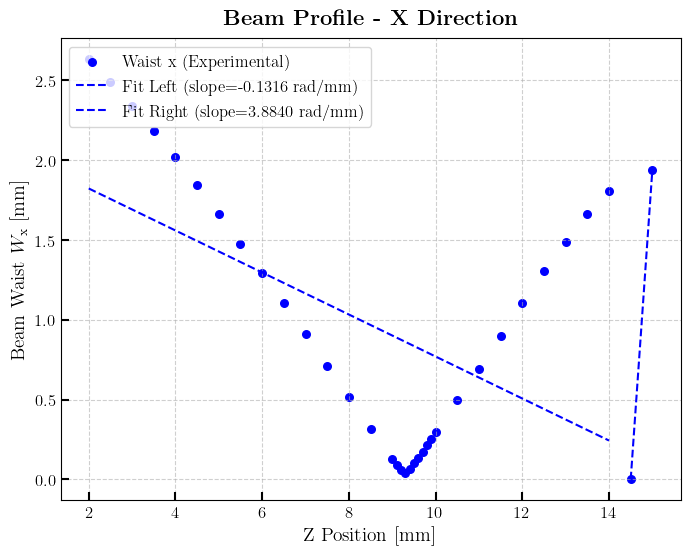

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/fig/beam_profile_y.png


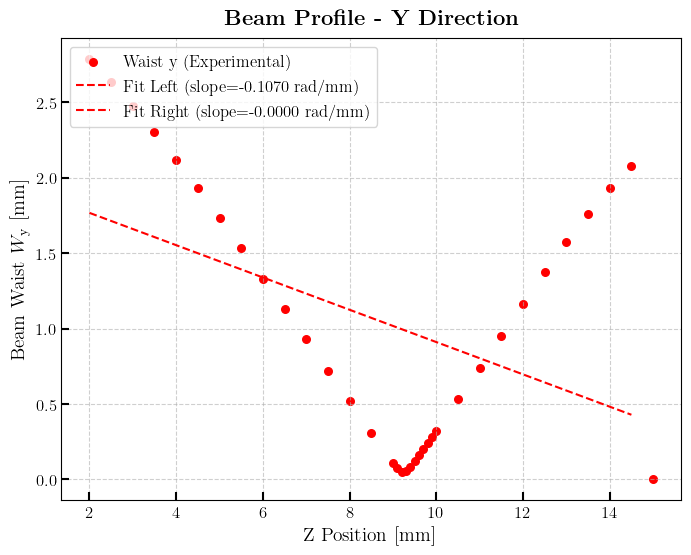

In [6]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015"
# Match both *mm_#001.txt and *m_#001.txt
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower() and
     float(os.path.basename(f).split('m')[0].strip()) <= 16],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    # Split on 'm' to handle both 'mm' and 'm'
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort data by z
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to µm) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")

# Linear fits for X direction
min_idx_x = np.argmin(width_x)
z_left_x = z_values[:min_idx_x]
width_x_left = width_x[:min_idx_x]
z_right_x = z_values[min_idx_x:]
width_x_right = width_x[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction
min_idx_y = np.argmin(width_y)
z_left_y = z_values[:min_idx_y]
width_y_left = width_y[:min_idx_y]
z_right_y = z_values[min_idx_y:]
width_y_right = width_y[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Plot Width x vs. z with linear fits
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
plt.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z with linear fits
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
plt.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()